In [ ]:
!pip install opendatasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import opendatasets as od
import pandas

od.download(
    "https://www.kaggle.com/datasets/rayhanzamzamy/non-and-biodegradable-waste-dataset")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: nishantsirwani
Your Kaggle Key: ··········


100%|██████████| 1.86G/1.86G [00:21<00:00, 93.7MB/s]


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import os


def view_random_image(target_dir, target_class):

  # set up the target directory (we'll view the images from here)

  target_folder = target_dir + target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)
  print(random_image)

  # Read the image and plot it using matplotlib

  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")

  print(f"Image shape: {img.shape}")
  return img

['TRAIN.1_BIODEG_ORI_1277.jpg']
Image shape: (200, 200, 3)


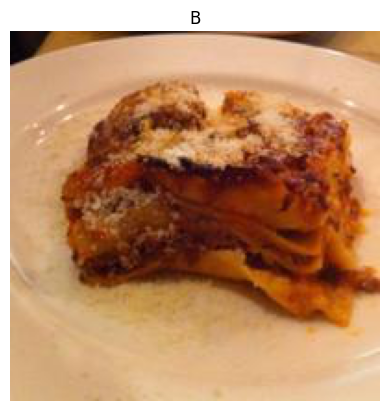

In [ ]:
img = view_random_image(target_dir = "non-and-biodegradable-waste-dataset/TRAIN.1/",
                        target_class = "B")

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

tf.random.set_seed(42)

# Get all the pixel values b/w 0 and 1 (normalizing the data)
train_datagen = ImageDataGenerator(rescale = 1./255)
valid_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)

train_dir_1 = "non-and-biodegradable-waste-dataset/TRAIN.1/"
train_dir_2 = "non-and-biodegradable-waste-dataset/TRAIN.2/"
train_dir_3 = "non-and-biodegradable-waste-dataset/TRAIN.3/"
train_dir_4 = "non-and-biodegradable-waste-dataset/TRAIN.4/"
test_dir = "non-and-biodegradable-waste-dataset/TEST/"

In [ ]:
train_data = train_datagen.flow_from_directory(directory = train_dir_1,
                                               batch_size = 32,
                                               target_size = (224, 224),
                                               class_mode="binary",
                                               seed=42)

Found 59922 images belonging to 2 classes.


In [ ]:
valid_data = valid_datagen.flow_from_directory(test_dir,
                                              batch_size=32,
                                              target_size=(224, 224),
                                              class_mode="binary",
                                              seed=42)

Found 16726 images belonging to 2 classes.


In [ ]:
test_data = test_datagen.flow_from_directory(train_dir_4,
                                             batch_size = 32,
                                             target_size=(224, 224),
                                             class_mode="binary",
                                             seed=42)

Found 59924 images belonging to 2 classes.


In [ ]:
import opendatasets as od
import pandas

od.download(
    "https://www.kaggle.com/datasets/techsash/waste-classification-data")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: nishantsirwani
Your Kaggle Key: ··········


100%|██████████| 427M/427M [00:08<00:00, 53.4MB/s]


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

tf.random.set_seed(42)

# Get all the pixel values b/w 0 and 1 (normalizing the data)
train_datagen = ImageDataGenerator(rescale = 1./255)
valid_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)

train_dir_waste = "/content/waste-classification-data/DATASET/TRAIN/"

test_dir_waste = "/content/waste-classification-data/DATASET/TEST/"


train_data = train_datagen.flow_from_directory(directory = train_dir_waste,
                                               batch_size = 32,
                                               target_size = (224, 224),
                                               class_mode="binary",
                                               seed=42)

test_data = test_datagen.flow_from_directory(test_dir_waste,
                                             batch_size = 32,
                                             target_size=(224, 224),
                                             class_mode="binary",
                                             seed=42)



Found 22564 images belonging to 2 classes.
Found 2513 images belonging to 2 classes.


In [ ]:
model_1 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation = "relu",
                           input_shape = (224, 224, 3)),
    tf.keras.layers.Conv2D(10, 3, activation= "relu"),
    tf.keras.layers.MaxPool2D(pool_size = 2,
                              padding = "valid"),
    tf.keras.layers.Conv2D(10, 3, activation = "relu"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation = "sigmoid")
])

model_1.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(0.001),
                metrics = ["accuracy"])

histroy_1 = model_1.fit(train_data, epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data = valid_data,
                        validation_steps=len(valid_data))





Epoch 1/5
1873/1873 [==============================] - 208s 105ms/step - loss: 0.3040 - accuracy: 0.8763 - val_loss: 0.3968 - val_accuracy: 0.8254
Epoch 2/5
1873/1873 [==============================] - 207s 111ms/step - loss: 0.2230 - accuracy: 0.9155 - val_loss: 0.3519 - val_accuracy: 0.8554
Epoch 3/5
1873/1873 [==============================] - 162s 86ms/step - loss: 0.1924 - accuracy: 0.9272 - val_loss: 0.3866 - val_accuracy: 0.8527
Epoch 4/5
1873/1873 [==============================] - 167s 89ms/step - loss: 0.1692 - accuracy: 0.9357 - val_loss: 0.4097 - val_accuracy: 0.8402
Epoch 5/5
1873/1873 [==============================] - 161s 86ms/step - loss: 0.1431 - accuracy: 0.9455 - val_loss: 0.4380 - val_accuracy: 0.8427


In [ ]:
model_1.save("ziya_model_1_waste_recog_riya")

In [ ]:
model_1.evaluate(test_data)

79/79 [==============================] - 7s 78ms/step - loss: 0.5266 - accuracy: 0.8297


[0.5265583992004395, 0.829685628414154]

In [ ]:
from google.colab import drive
drive.mount('/content/drive')





Mounted at /content/drive


In [ ]:
import tensorflow as tf

# Path to the model file in your Google Drive
model_path = '/content/drive/MyDrive/model_1'

# Load the model
model = tf.keras.models.load_model(model_path)

In [ ]:
model.evaluate(test_data)

79/79 [==============================] - 6s 74ms/step - loss: 0.5266 - accuracy: 0.8297


[0.5265582203865051, 0.829685628414154]

In [ ]:
preds = model.predict(test_data)

79/79 [==============================] - 6s 76ms/step


In [ ]:
preds[:10]

array([[0.9964463 ],
       [0.99891293],
       [0.00112131],
       [0.998995  ],
       [0.01549286],
       [0.13525568],
       [0.957726  ],
       [0.99948394],
       [0.99615496],
       [0.9461487 ]], dtype=float32)

In [ ]:
preds.shape

(2513, 1)

In [ ]:
labels = tf.round(preds)

In [ ]:
labels[:10]

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.]], dtype=float32)>

In [ ]:
!wget https://www.google.com/url?sa=i&url=https%3A%2F%2Ffoodtank.com%2Fnews%2F2015%2F06%2Fworld-environment-day-10-facts-about-food-waste-from-bcfn%2F&psig=AOvVaw38Rv00Dycpwxfy4DKl71In&ust=1685903515546000&source=images&cd=vfe&ved=0CBEQjRxqFwoTCMDZjJPep_8CFQAAAAAdAAAAABBZ

--2023-06-03 18:32:31--  https://www.google.com/url?sa=i
Resolving www.google.com (www.google.com)... 142.251.16.104, 142.251.16.147, 142.251.16.103, ...
Connecting to www.google.com (www.google.com)|142.251.16.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘url?sa=i’

url?sa=i                [ <=>                ]   1.36K  --.-KB/s    in 0s      

2023-06-03 18:32:31 (22.6 MB/s) - ‘url?sa=i’ saved [1389]



In [ ]:
from google.colab import files

In [ ]:
img = files.upload()

Saving 1.jpeg to 1.jpeg


In [ ]:
train_data = train_datagen.flow(img,
                                batch_size = 32,

                                seed=42)


In [ ]:
image_norm